In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=0.25, random_state=42)

print(f'Train X:{x_train.shape}, Y:{y_train.shape}')
print(f'Validation X:{x_validation.shape}, Y:{y_validation.shape}')
print(f'Test X:{x_test.shape}, Y:{y_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train X:(50000, 32, 32, 3), Y:(50000, 1)
Validation X:(2500, 32, 32, 3), Y:(2500, 1)
Test X:(7500, 32, 32, 3), Y:(7500, 1)


In [3]:
x_train, x_test, x_validation = x_train / 255.0, x_test / 255.0, x_validation / 255.0

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
train_result = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2732 - loss: 1.9911 - val_accuracy: 0.3752 - val_loss: 1.7263
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3783 - loss: 1.7168 - val_accuracy: 0.3984 - val_loss: 1.6341
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4082 - loss: 1.6451 - val_accuracy: 0.4248 - val_loss: 1.5775
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4313 - loss: 1.5867 - val_accuracy: 0.4256 - val_loss: 1.5896
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4404 - loss: 1.5612 - val_accuracy: 0.4340 - val_loss: 1.5815
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4489 - loss: 1.5287 - val_accuracy: 0.4340 - val_loss: 1.6205
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4609 - loss: 1.5033 - val_accuracy: 0.4660 - val_loss: 1.5070
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4694 - loss: 1.4833 - 

In [13]:
test_result = model.evaluate(x_test, y_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4395 - loss: 1.5352


In [14]:
test_result

[1.5224595069885254, 0.4474666714668274]

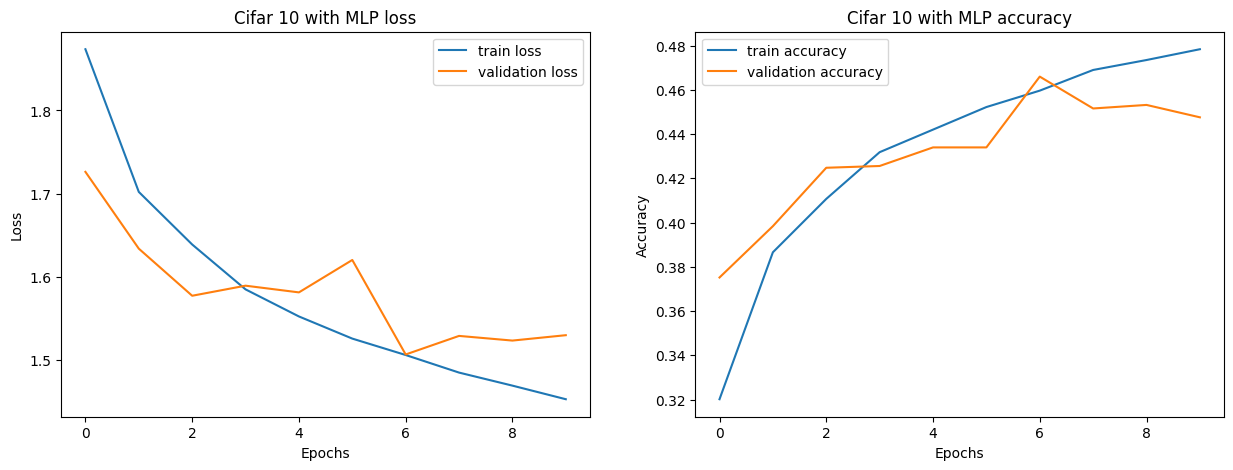

In [15]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('Cifar 10 with MLP loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('Cifar 10 with MLP accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()